## LIBRERIAS

In [52]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import scipy.stats as scs
from datetime import datetime
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

## RISK PREMIA VALUE

La estratégia consiste en escoger un conjunto de empresas bursátiles y a partir de estas establece un ranking según dos indicadores value como son el EBITDA y Dividendo repartido en los doce últimos meses. Para poder implmentar mejor esta estratégia hemos seleccionado un conjunto de empresas del mismo sector puesto que esto indicadores value son característicos de los sectores en los que se encuentran.

In [53]:
activos_nasdaq = pd.read_csv('./data/activos_nasdaq.csv')
activos_nasdaq['Date'] = pd.to_datetime(activos_nasdaq['Date'], format="%Y-%m-%d")
activos_nasdaq = activos_nasdaq.set_index('Date')
activos_nasdaq = activos_nasdaq.iloc[:,:-1]
activos_nasdaq

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,GILD UW Equity,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-29,126.692297,34.195179,380.471212,153.838431,102.071591,486.548043,56.835418,25.741642,43.472804,21.959082,...,90.667290,31.076054,21.612346,313.241665,109.665597,43.273428,89.657119,28.373403,194.059192,48.347943
2015-04-30,126.120753,33.955928,373.745599,149.957247,99.289190,476.145052,56.277166,25.546696,43.100635,21.727895,...,89.063422,30.429190,21.000926,305.201943,109.240261,42.879107,88.903921,28.213903,177.471119,47.388369
2015-05-01,128.796820,34.266068,374.711465,152.854843,102.718455,476.641277,56.844279,25.812531,43.113927,22.113887,...,93.050940,30.154495,21.585762,315.233651,111.296048,43.286719,89.134311,28.267070,179.411711,47.233121
2015-05-04,134.928736,34.398986,374.862104,151.791505,103.072901,479.193288,57.083531,25.847976,42.746189,22.044858,...,93.626915,30.305134,21.665513,315.233651,111.916329,43.765222,89.754592,28.426570,180.501632,47.134320
2015-05-05,132.199502,34.443291,373.222791,149.354689,100.946225,470.349860,55.692330,25.599863,42.179076,21.606675,...,91.260987,31.014026,21.328789,314.890725,108.238951,43.499387,88.620365,27.908193,172.562042,46.760379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,747.951978,99.165133,2189.625694,105.376800,95.159894,1268.757228,194.085776,41.027126,162.008412,40.052400,...,66.600406,140.910013,120.706590,267.119377,253.996013,63.755977,256.929054,22.950379,94.902920,129.948770
2020-06-02,761.855123,100.370250,2190.839672,103.037456,95.992842,1275.314479,192.632547,41.549934,163.851531,40.743569,...,64.916787,142.505020,119.271084,268.368799,251.895921,64.881343,254.474516,23.614966,95.018115,127.485370
2020-06-03,756.316904,101.982979,2196.147501,100.813307,98.544853,1272.797913,189.593173,41.594240,164.250283,41.160043,...,65.926959,137.392136,114.574674,268.138409,245.462726,66.272543,257.061971,24.766915,99.643636,123.675075


In [54]:
indicadores = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja2')
indicadores = indicadores.set_index('Ticker')
len(indicadores)

44

In [55]:
indicadores.head()

,Price,OPER_MARGIN,RETURN_ON_INV_CAPITAL,ROC_WACC_RATIO,OPERATING_ROIC,OPER_INC_TO_TOT_DEBT,CUR_MKT_CAP,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,Unnamed: 13,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,Unnamed: 18,TWITTER_SENTIMENT,NEWS_SENTIMENT
Ticker,,,,,,,,,,,,,,,,,,,,
MELI UW Equity,866.93,-6.669863,-7.835844,-0.466724,-5.466515,-0.150538,4.309505e+10,-,23.0879,189.608,-330.771,-,NaN,3.869565,23,12,2,NaN,0.415005,-0.342350
CDW UW Equity,125.34,6.286462,19.492927,2.192339,25.143969,0.325888,1.783815e+10,23.6838,20.0471,18.0812,19.2488,24.912,NaN,3.800000,10,5,1,NaN,0.297486,0.009725
AMZN UW Equity,2483.00,5.183551,4.500000,1.299721,11.393006,0.187541,1.238461e+12,118.634,18.9824,30.95,13.4429,0,NaN,4.745454,55,50,1,NaN,-0.033902,0.449071
ALXN UW Equity,115.21,42.483621,17.732685,1.980240,1.420000,0.767510,2.544153e+10,12.0687,2.16831,11.6339,2977.14,0,NaN,4.360000,25,17,0,NaN,0.197014,-0.402494
BMRN UW Equity,105.80,-5.895198,2.837115,0.395703,1.500000,-0.110438,1.913254e+10,133.534,5.90273,215.855,70.4545,-,NaN,4.538462,26,20,0,NaN,0.118857,-0.212550


In [56]:
ratios = indicadores.loc[activos_nasdaq.columns, ['OPERATING_ROIC', 'ROC_WACC_RATIO']]
ratios

,OPERATING_ROIC,ROC_WACC_RATIO
MELI UW Equity,-5.466515,-0.466724
CDW UW Equity,25.143969,2.192339
AMZN UW Equity,11.393006,1.299721
ALXN UW Equity,1.420000,1.980240
BMRN UW Equity,1.500000,0.395703
GOOG UW Equity,17.027738,1.899500
VRSN UW Equity,1.340000,30.761191
CSCO UW Equity,24.375592,2.558312
MSFT UW Equity,27.060648,2.672929
EBAY UW Equity,19.243732,2.835520


In [57]:
# me quedo unicamente con las empresas de las que tengo datos de los ratios

precios = activos_nasdaq.loc[:,ratios.index]

precios.head()

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,GILD UW Equity,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-29,126.692297,34.195179,380.471212,153.838431,102.071591,486.548043,56.835418,25.741642,43.472804,21.959082,...,90.667290,31.076054,21.612346,313.241665,109.665597,43.273428,89.657119,28.373403,194.059192,48.347943
2015-04-30,126.120753,33.955928,373.745599,149.957247,99.289190,476.145052,56.277166,25.546696,43.100635,21.727895,...,89.063422,30.429190,21.000926,305.201943,109.240261,42.879107,88.903921,28.213903,177.471119,47.388369
2015-05-01,128.796820,34.266068,374.711465,152.854843,102.718455,476.641277,56.844279,25.812531,43.113927,22.113887,...,93.050940,30.154495,21.585762,315.233651,111.296048,43.286719,89.134311,28.267070,179.411711,47.233121
2015-05-04,134.928736,34.398986,374.862104,151.791505,103.072901,479.193288,57.083531,25.847976,42.746189,22.044858,...,93.626915,30.305134,21.665513,315.233651,111.916329,43.765222,89.754592,28.426570,180.501632,47.134320
2015-05-05,132.199502,34.443291,373.222791,149.354689,100.946225,470.349860,55.692330,25.599863,42.179076,21.606675,...,91.260987,31.014026,21.328789,314.890725,108.238951,43.499387,88.620365,27.908193,172.562042,46.760379


Para hacer una estrategia value con los ratios de las empresas el sector al que se encuentre el la empresa es clave para determinar si sus ratios son buenos o malos.

Por ejemplo, las empresas de sectores con crecimientos bajos (industrial auomovilístico, petrolífico) en comparacion con otros sectores. Esto hace que si realizamos un ranking por dividendo o beneficios entre diferentes sectores, las compañias de alto crecimiento van a salir como opcion de venta ya que muchas tienen puesto el objetivo de beneficios y por tanto dividendos derivados de ellos a muy largo plazo (no aportan dividendo al reinvertir todos sus ingresos en el crecimiento del negocio).


Establezco el ranking indicando que las mejores posiciones son las que tienen un ratio mas alto (mayor EBITDA o mayor Dividendos)

In [58]:
ratios.rank(axis=0,method='first',ascending=False).astype(int)

,OPERATING_ROIC,ROC_WACC_RATIO
MELI UW Equity,38,37
CDW UW Equity,9,21
AMZN UW Equity,24,29
ALXN UW Equity,35,23
BMRN UW Equity,34,33
GOOG UW Equity,20,24
VRSN UW Equity,36,1
CSCO UW Equity,10,17
MSFT UW Equity,6,15
EBAY UW Equity,17,14


In [59]:
len(ratios)

41

In [60]:
ratios = ratios.rank(axis=0,method='first',ascending=False).astype(int)
longWeight_1 = 0.3
shortWeight_1 = -0.3
longWeight_2 = 0.3
shortWeight_2 = -0.3
longRank = 20
shortRank = 20
n = ratios.iloc[:,0].max()
f = n-shortRank
ratios.head(10).style.background_gradient(cmap='YlGnBu')

,OPERATING_ROIC,ROC_WACC_RATIO
MELI UW Equity,38,37
CDW UW Equity,9,21
AMZN UW Equity,24,29
ALXN UW Equity,35,23
BMRN UW Equity,34,33
GOOG UW Equity,20,24
VRSN UW Equity,36,1
CSCO UW Equity,10,17
MSFT UW Equity,6,15
EBAY UW Equity,17,14


In [61]:
ratios['OPERATING_ROIC'] = np.where(ratios['OPERATING_ROIC']<=longRank,longWeight_1/longRank, 
                        np.where(ratios['OPERATING_ROIC']>f,shortWeight_1/shortRank,0))
ratios['ROC_WACC_RATIO'] = np.where(ratios['ROC_WACC_RATIO']<=longRank,longWeight_2/longRank, 
                        np.where(ratios['ROC_WACC_RATIO']>f,shortWeight_2/shortRank,0))

In [62]:
ratios['Total'] = ratios.sum(1)
ratios

,OPERATING_ROIC,ROC_WACC_RATIO,Total
MELI UW Equity,-0.015,-0.015,-0.030
CDW UW Equity,0.015,0.000,0.015
AMZN UW Equity,-0.015,-0.015,-0.030
ALXN UW Equity,-0.015,-0.015,-0.030
BMRN UW Equity,-0.015,-0.015,-0.030
GOOG UW Equity,0.015,-0.015,0.000
VRSN UW Equity,-0.015,0.015,0.000
CSCO UW Equity,0.015,0.015,0.030
MSFT UW Equity,0.015,0.015,0.030
EBAY UW Equity,0.015,0.015,0.030


In [63]:
rentabilidades = activos_nasdaq[ratios.index].pct_change().dropna()
rentabilidades.head()

,MELI UW Equity,CDW UW Equity,AMZN UW Equity,ALXN UW Equity,BMRN UW Equity,GOOG UW Equity,VRSN UW Equity,CSCO UW Equity,MSFT UW Equity,EBAY UW Equity,...,GILD UW Equity,SGEN UW Equity,TTWO UW Equity,BIIB UW Equity,VRTX UW Equity,PAYX UW Equity,INTU UW Equity,TCOM UW Equity,BIDU UW Equity,CTXS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,-0.004511,-0.006997,-0.017677,-0.025229,-0.027259,-0.021381,-0.009822,-0.007573,-0.008561,-0.010528,...,-0.017690,-0.020816,-0.028290,-0.025666,-0.003878,-0.009112,-0.008401,-0.005621,-0.085479,-0.019847
2015-05-01,0.021218,0.009134,0.002584,0.019323,0.034538,0.001042,0.010077,0.010406,0.000308,0.017765,...,0.044772,-0.009027,0.027848,0.032869,0.018819,0.009506,0.002591,0.001884,0.010935,-0.003276
2015-05-04,0.047609,0.003879,0.000402,-0.006957,0.003451,0.005354,0.004209,0.001373,-0.008529,-0.003121,...,0.006190,0.004996,0.003695,0.000000,0.005573,0.011054,0.006959,0.005643,0.006075,-0.002092
2015-05-05,-0.020227,0.001288,-0.004373,-0.016054,-0.020633,-0.018455,-0.024371,-0.009599,-0.013267,-0.019877,...,-0.025270,0.023392,-0.015542,-0.001088,-0.032858,-0.006074,-0.012637,-0.018236,-0.043986,-0.007934
2015-05-06,-0.004558,-0.005917,-0.004962,-0.080332,0.050737,-0.012396,0.007796,0.002769,-0.027731,-0.007681,...,-0.006991,0.064857,0.002077,-0.005805,0.006386,-0.001833,-0.004700,0.005398,-0.024083,-0.006489


In [64]:
# genero los resultados como un indice de base 100
resultados_value = [100]

# voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
# distintas acciones y sus pesos
for i in range(1, len(rentabilidades)):
    value = resultados_value[i-1] * (1 + (rentabilidades.iloc[i-1] * ratios['Total'].values).sum())
    resultados_value.append(value)
resultados_value = pd.DataFrame(resultados_value, columns=['RISK_VALUE'])  
resultados_value.set_index(rentabilidades.index, inplace=True)

In [65]:
resultados_value

,RISK_VALUE
Date,
2015-04-30,100.000000
2015-05-01,100.351114
2015-05-04,100.331612
2015-05-05,100.054058
2015-05-06,100.226798
...,...
2020-06-01,105.755118
2020-06-02,105.343503
2020-06-03,105.159990


In [66]:
resultados_value.to_csv('./data_resultante/value_nasdaq.csv')

### Comparacion con índice Nasdaq

In [67]:
nasdaq = pd.read_csv('./data/nasdaq.csv')
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'], format="%Y-%m-%d")
nasdaq = nasdaq.set_index('Date')
nasdaq

,Nasdaq,Rentabilidad,Buy&Hold
Date,,,
2015-04-30,4378.670097,NaN,100.000000
2015-05-01,4435.352217,1.294505,101.294505
2015-05-04,4445.576212,0.230511,101.528001
2015-05-05,4376.811913,-1.546803,99.957563
2015-05-06,4359.371397,-0.398475,99.559257
...,...,...,...
2020-06-01,8464.214226,0.655193,193.305594
2020-06-02,8514.125541,0.589675,194.445468
2020-06-03,8580.173012,0.775740,195.953859


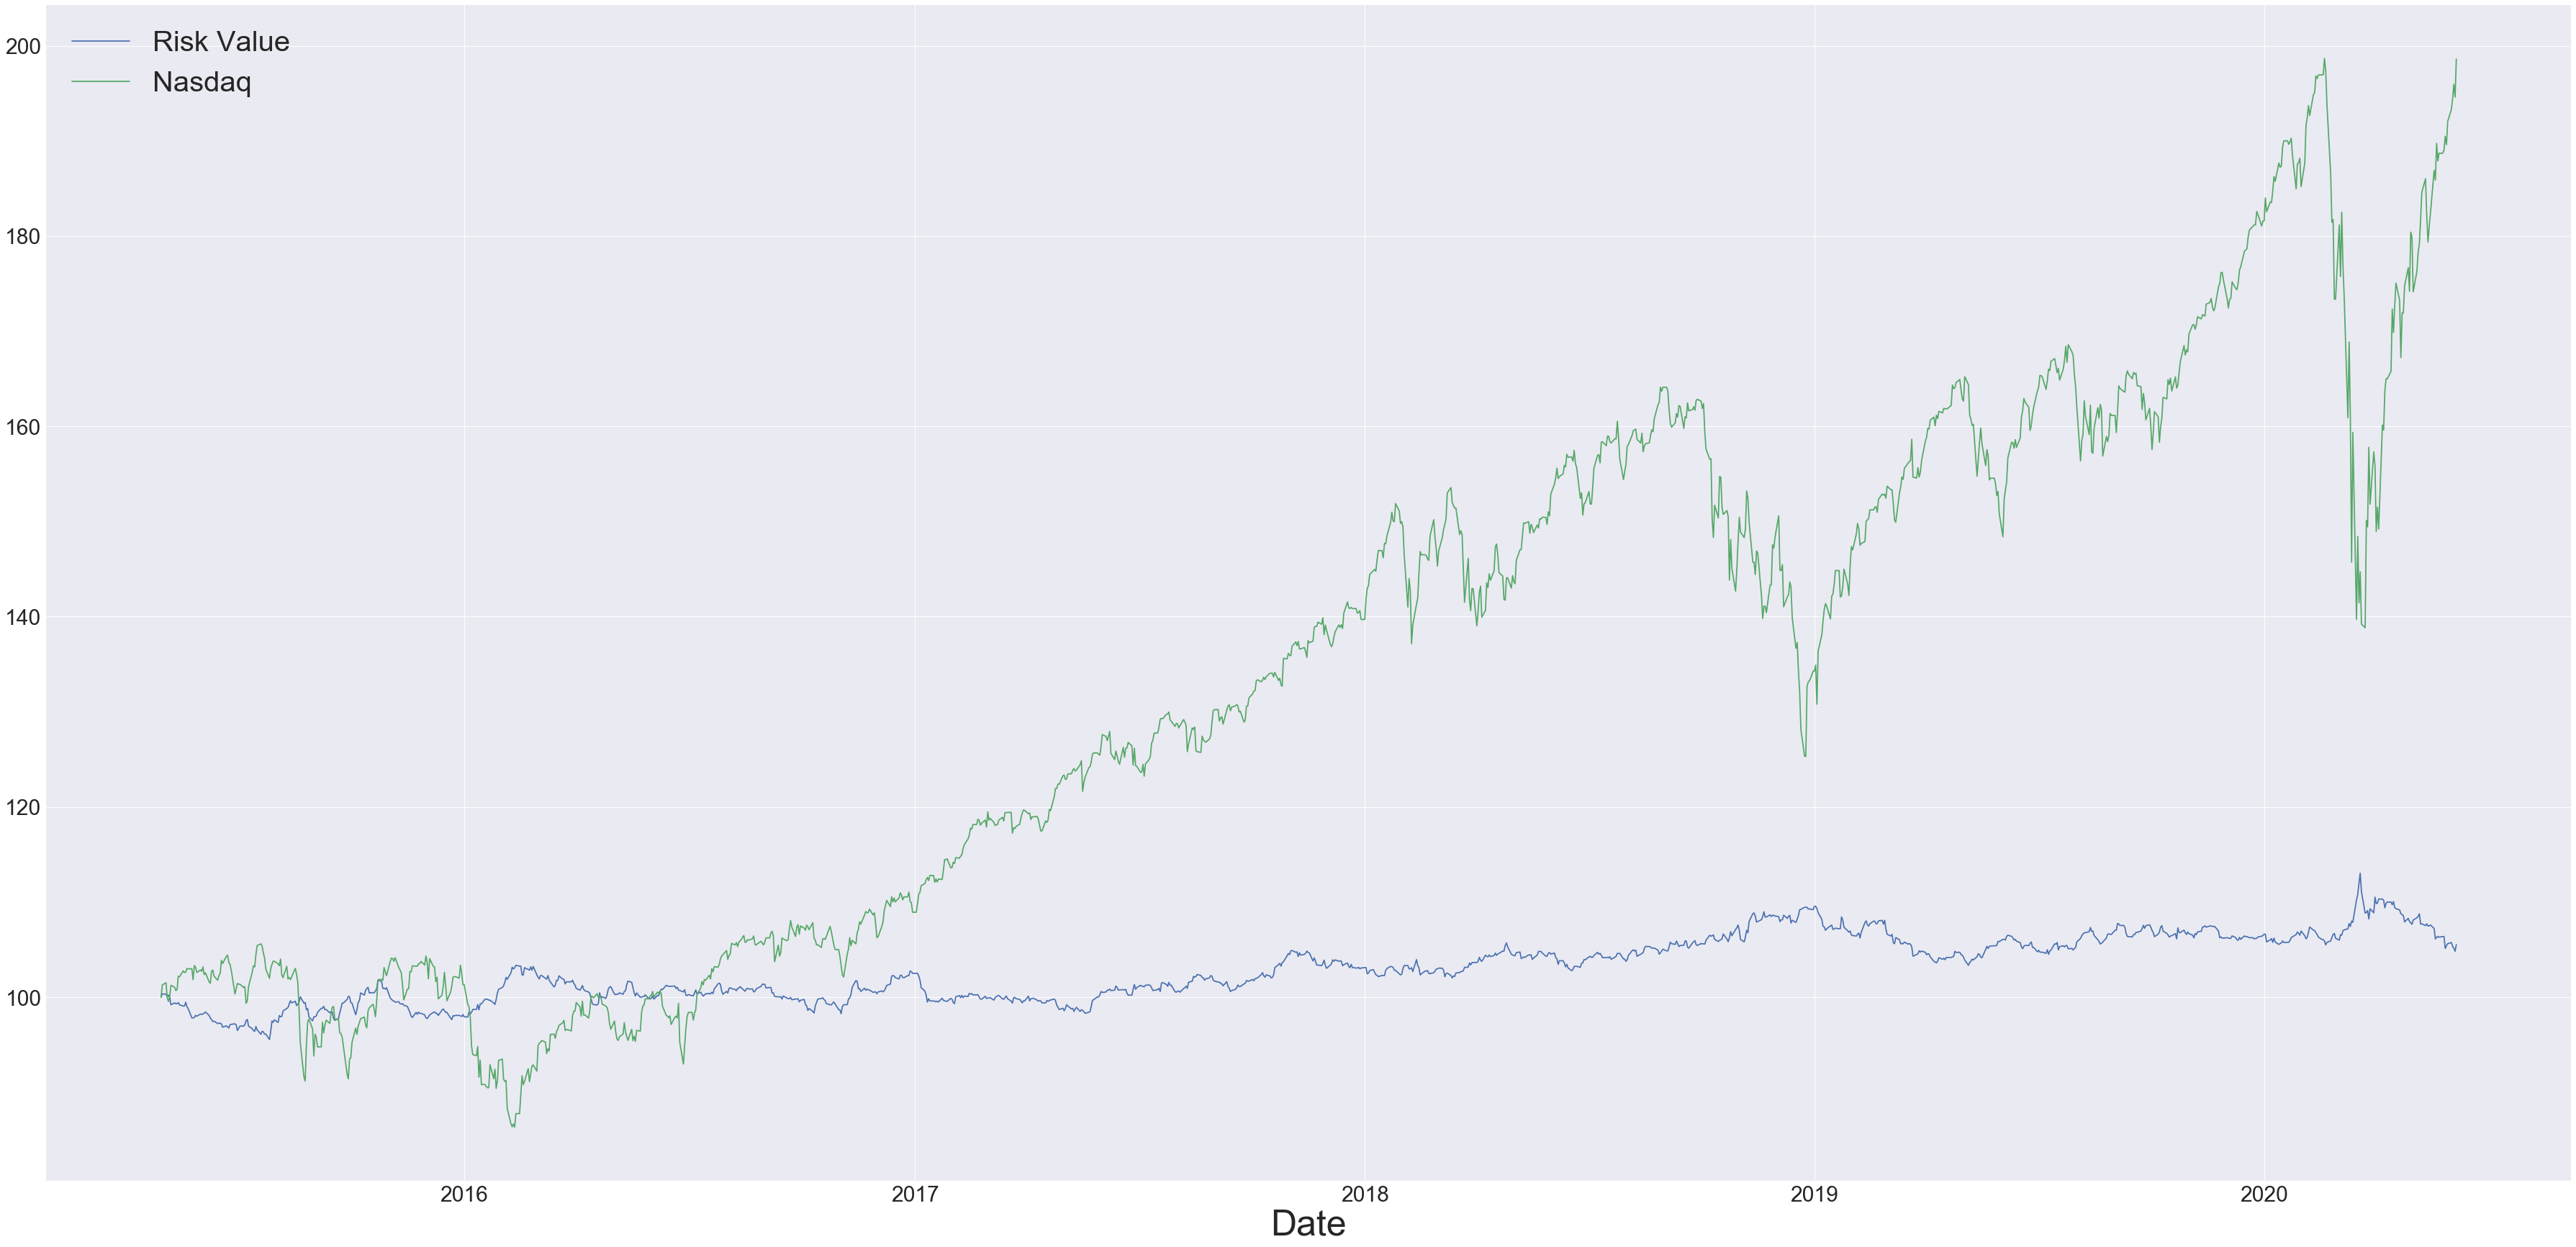

In [68]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(resultados_value["RISK_VALUE"])
ax1 = plt.plot(nasdaq["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Risk Value", "Nasdaq"],
                 prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

### Conclusiones

Un comportamiento que se observa de esta estratégia es que en los momentos de gran volatilidad ocurridos en el MSCI con importantes caidas a finales de 2015, principios de 2016 y principios de 2019 el modelo se ha desligado siendo una cartera mas estable a lo largo del tiempo. 

Este modelo se podría formar con otros sectores en función de la economía macro en la que nos encontramos actualmente. La cartera consigue un importante rally alcista a partir de la mitad del 2018 (superando al MSCI) y es posible, teniendo en cuenta que este modelo se ha creado con el sector pharmaceútico su comportamiento pueda ser destacado en el futuro